In [3]:
#@title The MIT License (MIT)
#
# Copyright (c) 2024 Eric dos Santos.
#
# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this software and associated documentation files (the "Software"), to deal
# in the Software without restriction, including without limitation the rights
# to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
# copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
# THE SOFTWARE.

## Reconhecimento facial baseado em transfer learning: Fernanda Montenegro e Fernanda Torres

Para esta aplicação será utilizado o modelo pré-treinado MobileNetV2 para treinar uma nova rede neural capaz de indentificar as atrizes Fernanda Montenegro e Fernanda Torres. O objetivo é explorar técnicas de Deep Learning e Transfer Learning.

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2

#### Configurações da rede neural

- **Carrega** o modelo pré-treinado MobileNetV2;
- **Adição** de camadas personalizadas;
- **Definição** final do modelo;
- **Congelamento** das camadas do modelo base.

In [5]:
base_model = MobileNetV2(weights="imagenet", include_top=False); # include_top=False: remove a última camada

x = base_model.output # obtém a camada de saída
x = GlobalAveragePooling2D()(x) # Reduz a dimensionalidade
x = Dense(1024, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x) # duas saídas: Fernanda Montenegro e Fernanda Torres

# Define o modelo a ser treinado
model = Model(inputs=base_model.input, outputs=predictions)

# Congela as camadas do modelo base
for layer in base_model.layers:
  layer.trainable = False

<ipython-input-5-dc05cd35d442>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights="imagenet", include_top=False); # include_top=False: remove a última camada


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


#### Gerador de dados para treinamento

**Prepara** e **pré-processa** as imagens para o **treinamento** e **validação** de um modelo de aprendizado profundo, utilizando a biblioteca Keras. Ele realiza duas funções principais: aumento de dados e criação de geradores de dados.

1. **Criação do ImageDataGenerator**

  Aplica transformações para melhorar a generalização do modelo.

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255, # Normaliza os valores dos pixels
    rotation_range=30, # Rotaciona aleatoriamente a imagem
    width_shift_range=0.2, # Realiza deslocamento horizontal
    height_shift_range=0.2, # Realiza deslocamento vertical
    shear_range=0.2, # Distorce levemente a imagem
    zoom_range=0.2, # Realiza zoom aleatório na imagem
    horizontal_flip=True, # Espelha aleatoriamente a imagem
    fill_mode='nearest', # Preenche os pixels gerados após a transformação
    validation_split=0.2 # Separa dados para treinamento
)

2. **Gerador para o conjunto de treinamento**

  Fornece lotes de imagens aumentadas para o treinamento.

In [7]:
train_generator = train_datagen.flow_from_directory(
    'dataset/', # diretório de imagens
    batch_size=32, # processamento em lotes, 32 imagens
    class_mode='categorical', # codifica labels em one-hot
    subset='training' # Conjunto treinamento
)

Found 289 images belonging to 2 classes.


3. **Gerador para o conjunto de validação**

  Fornece lotes de imagens (com ou sem aumentos) para avaliar o desempenho do modelo em dados não vistos.

In [ ]:
validation_generator = train_datagen.flow_from_directory(
    'dataset/', # diretório de imagens
    batch_size=32, # processamento em lotes, 32 imagens
    class_mode='categorical', # codifica labels em one-hot
    subset='validation' # Conjunto para validação
)

Found 289 images belonging to 2 classes.


#### Etapas de Treinamento do Modelo

1. **Compilação do modelo**

  Prepara o modelo para o treinamento, configurando o otimizador, a função de perda (loss) e as métricas de avaliação.

In [9]:
model.compile(
  optimizer=Adam(learning_rate=0.001), # Otimizador
  loss='categorical_crossentropy', # Monitorar a acurácia
  metrics=['accuracy']
)

2. **Treinamento do modelo**

In [10]:
model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 69s 7s/step - accuracy: 0.5333 - loss: 2.1186 - val_accuracy: 0.6215 - val_loss: 0.9086
Epoch 2/10
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 1.0000 - loss: 0.0118

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


9/9 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 1.0000 - loss: 0.0118 - val_accuracy: 0.6632 - val_loss: 0.7423
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 101s 5s/step - accuracy: 0.6739 - loss: 0.6955 - val_accuracy: 0.8646 - val_loss: 0.3400
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - accuracy: 0.8438 - loss: 0.4959 - val_accuracy: 0.8507 - val_loss: 0.3705
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 106s 5s/step - accuracy: 0.8285 - loss: 0.3959 - val_accuracy: 0.8576 - val_loss: 0.3038
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 36s 4s/step - accuracy: 0.9062 - loss: 0.2558 - val_accuracy: 0.8958 - val_loss: 0.2631
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 106s 5s/step - accuracy: 0.9092 - loss: 0.2460 - val_accuracy: 0.8958 - val_loss: 0.2221
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 36s 4s/step - accuracy: 0.9062 - loss: 0.2145 - val_accuracy: 0.9306 - val_loss: 0.2063
Epoch 9/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 145s 10s/step - accuracy: 0.9470 - loss: 0.2031 - val_accuracy: 0.9340 - val_loss: 0.2010
Epoch 10/10
9/

3. **Salvamento do modelo**

In [11]:
model.save('fs_detector_model.h5')

### Arquiva o modelo

Salva o modelo treinado para reutilização no reconhecimento facial.

In [12]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model


1. **Carregamento do modelo treinado**

In [14]:
model = load_model('fs_detector_model.h5')

2. **Carregamento e processamento da imagem**

In [15]:
image = cv2.imread('montenegro_e_torres.png')
image_array = np.expand_dims(image, axis=0) / 255.0

3. **Realiza a predição**

In [16]:
predictions = model.predict(image_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


4. **Mapeamento das classes**

In [17]:
class_indices = train_generator.class_indices
classes = {v: k for k, v in class_indices.items()}

5. **Identificação das classes preditas**

In [18]:
predicted_class = classes[np.argmax(predictions)]
confidence = np.max(predictions)

6. **Exibição dos resultados**

In [ ]:
print(f"Previsão: {predicted_class} com confiança {confidence:.2f}")

Previção: Fernanda_Montenegro com confiança 0.76


 Mostra a classe predita e a confiança em formato percentual (duas casas decimais).

### Reconhecimento facial da imagem

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


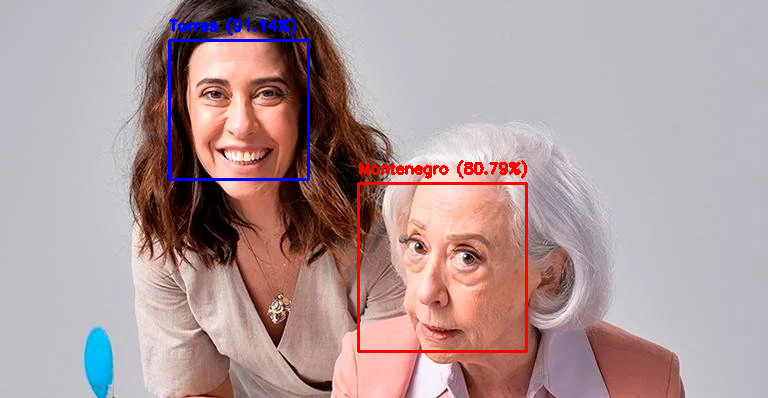

In [48]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow  # Import correto

# Carrega o modelo treinado
model = load_model('fs_detector_model.h5')

# Carrega o classificador Haar Cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Dicionário de classes
class_indices = {'Montenegro': 0, 'Torres': 1}
classes = {v: k for k, v in class_indices.items()}

# Carrega a imagem
image = cv2.imread('montenegro_e_torres.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detectar rostos na imagem
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Identifica diferentes rostos na imagem
for (x, y, w, h) in faces:
    face = image[y:y+h, x:x+w]
    face_resized = cv2.resize(face, (224, 224))
    face_array = np.expand_dims(face_resized, axis=0) / 255.0

    # Realiza a predição
    predictions = model.predict(face_array)
    predicted_class = classes[np.argmax(predictions)]
    confidence = np.max(predictions)

    # Adiciona rótulo à imagem
    label = f"{predicted_class} ({confidence*100:.2f}%)"
    color = (0, 0, 255) if predicted_class == 'Montenegro' else (255, 0, 0)
    cv2.rectangle(image, (x, y), (x+w, y+h), color, 2)
    cv2.putText(image, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Exibe a imagem com resultados
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()